# SIR Model

----

### Imports

In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import time
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
%matplotlib inline

### The system of equations

In [6]:
def sir(state, t, beta, delta):
    S, I, R = state
    S_prime = -beta*S*I
    I_prime = beta*S*I - delta*I
    R_prime = delta*I
    return [S_prime, I_prime, R_prime]

### Our best guesses for parameters

In [7]:
# parameters
delta = 1.0
beta = .003

In [8]:
t = np.linspace(0,10,num=100)
state0 = [1000,1,0]
numerical_sol = sp.integrate.odeint(sir, state0, t, args=(beta,delta))
S = numerical_sol[:,0]
I = numerical_sol[:,1]
R = numerical_sol[:,2]

### Plot results over time

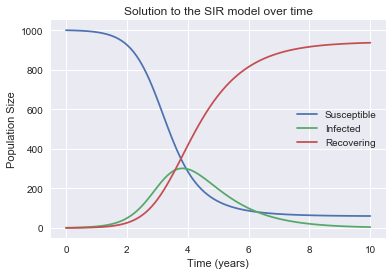

In [16]:
plt.plot(t, S, label="Susceptible")
plt.plot(t, I, label= "Infected")
plt.plot(t, R, label= "Recovering")
plt.title("Solution to the SIR model over time")
plt.xlabel("Time (years)")
plt.ylabel("Population Size")
plt.legend()
plt.savefig('sir.png')